In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import statistics 
import math

In [3]:
!pip install st-dbscan
from st_dbscan import ST_DBSCAN

In [4]:
df_fix = pd.read_csv("C:/Users/t480/Desktop/University courses/ENSAE 2A/STATAPP/Statapp-Hail-storm/bdd.csv")

In [5]:
def convert_time_to_timestamps(df):
    df['TIME_EVENT'] = pd.to_datetime(df['TIME_EVENT'],format = '%Y-%m-%d %H:%M:%S')
    df['TIME_EVENT'] = df.TIME_EVENT.values.astype(np.float64) # in nanoseconds
    df.TIME_EVENT = df.TIME_EVENT / (10 ** 9) # in seconds 
    df.TIME_EVENT = df.TIME_EVENT / 3600 # in hours
    return df

In [6]:
def getting_ready(df, keep_col, country, year_since):
    df = convert_time_to_timestamps(df)
    df = df[df['COUNTRY'] == country]
    df = df[df['YEAR'] >= year_since]
    df = df[keep_col]
    df = df.reset_index(drop=True)
    return df 

In [7]:
def run_dbscan_retrieve_classes(df, spatial_th, time_th, min_sample):
    model = ST_DBSCAN(eps1=spatial_th, eps2=time_th, min_samples=min_sample)
    fit = model.fit(df) 
    labels = pd.DataFrame(model.labels)
    df['LABELS'] = labels
    return df

In [47]:
def visualise_biggest(df, n_biggest):

    nb_reports = pd.DataFrame(df['LABELS'].value_counts()).reset_index()
    labels_biggest_storms = list(nb_reports.iloc[1:n_biggest+1,0])
    print('The storm with most reports is number', labels_biggest_storms[0])
    
    df_biggest = df.loc[df.LABELS.isin(labels_biggest_storms)]

    # plots the n_biggest storms 
    plt.figure(figsize=(10,6))
    plt.scatter(df_biggest.LONGITUDE, df_biggest.LATITUDE, c=df_biggest.LABELS, cmap='Paired')
    plt.title("The {} biggest storms in terms of report counts".format(len(labels_biggest_storms)))

    # plots the biggest storm
    fig, ax = plt.subplots()
    ax.scatter(df_biggest.LONGITUDE[df_biggest.LABELS == labels_biggest_storms[0]], df_biggest.LATITUDE[df_biggest.LABELS == labels_biggest_storms[0]], label='most reported storm')   
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')
    ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    fig.show

    # plot timing of storms
    for i in range(n_biggest):
        x = df_biggest.LONGITUDE[df_biggest.LABELS == labels_biggest_storms[i]]
        y = df_biggest.LATITUDE[df_biggest.LABELS == labels_biggest_storms[i]]
        z = df_biggest.TIME_EVENT[df_biggest.LABELS == labels_biggest_storms[i]]
        z = z - z.iloc[-1]
        x = x.array
        y = y.array
        z = z.array
        axis = plt.subplot(111, title="Storm with {} reports".format(len(x)))
        sc = axis.scatter(x, y, c=z, marker=".")
        plt.colorbar(sc, label="duration of the storm (in hours)")
        plt.show()

    return df

In [69]:
def visualise_biggest(df, n_biggest):

    nb_reports = pd.DataFrame(df['LABELS'].value_counts()).reset_index()
    labels_biggest_storms = list(nb_reports.iloc[1:n_biggest+1,0])
    print('The storm with most reports is number', labels_biggest_storms[0])
    
    df_biggest = df.loc[df.LABELS.isin(labels_biggest_storms)]

    # plots the n_biggest storms 
    plt.figure(figsize=(10,6))
    for i in range(n_biggest):
        a = df_biggest.LONGITUDE[df_biggest.LABELS == labels_biggest_storms[i]]
        b = df_biggest.LATITUDE[df_biggest.LABELS == labels_biggest_storms[i]]
        lab = df_biggest.loc[df_biggest.LABELS == labels_biggest_storms[i]]
        plt.scatter(a, b, c='C{}'.format(i), label='{} most reported storm'.format(i+1))
    plt.ylabel('latitude')
    plt.xlabel('longitude')
    plt.legend()
    plt.title("The {} biggest storms in terms of report counts".format(len(labels_biggest_storms)))
    plt.show()

    # plot timing of storms
    for i in range(n_biggest):
        x = df_biggest.LONGITUDE[df_biggest.LABELS == labels_biggest_storms[i]]
        y = df_biggest.LATITUDE[df_biggest.LABELS == labels_biggest_storms[i]]
        z = df_biggest.TIME_EVENT[df_biggest.LABELS == labels_biggest_storms[i]]
        z = z - z.iloc[-1]
        x = x.array
        y = y.array
        z = z.array
        axis = plt.subplot(111, title="Storm with {} reports".format(len(x)))
        sc = axis.scatter(x, y, c=z, marker=".")
        plt.colorbar(sc, label="duration of the storm (in hours)")
        plt.show()

    return df

In [60]:
df = df_fix.copy()
df

,Unnamed: 0,LATITUDE,LONGITUDE,TIME_EVENT,COUNTRY,YEAR
0,0,45.567,5.933,2022-10-24 10:15:00,FR,2022
1,1,45.596,5.875,2022-10-24 09:52:00,FR,2022
2,2,50.967,2.667,2022-10-23 17:00:00,BE,2022
3,3,51.000,2.700,2022-10-23 17:00:00,BE,2022
4,4,49.583,1.358,2022-10-23 16:30:00,FR,2022
...,...,...,...,...,...,...
43607,43607,48.750,7.100,2007-02-11 15:10:00,FR,2007
43608,43608,52.150,14.650,2007-01-18 19:00:00,DE,2007
43609,43609,52.083,10.333,2007-01-18 17:10:00,DE,2007
43610,43610,43.600,39.730,2007-01-16 02:00:00,RU,2007


In [61]:
keep_col = ['LATITUDE',	'LONGITUDE', 'TIME_EVENT']
country = 'FR'
year_since = 2022
df = getting_ready(df, keep_col, country, year_since)
df

,LATITUDE,LONGITUDE,TIME_EVENT
0,45.567,5.933,462946.250000
1,45.596,5.875,462945.866667
2,49.583,1.358,462928.500000
3,49.533,1.267,462928.416667
4,49.521,1.251,462928.383333
...,...,...,...
1975,43.279,2.460,458531.666667
1976,44.600,-0.933,458514.500000
1977,48.669,5.114,458174.283333
1978,48.636,4.952,458174.166667


The storm with most reports is number 163


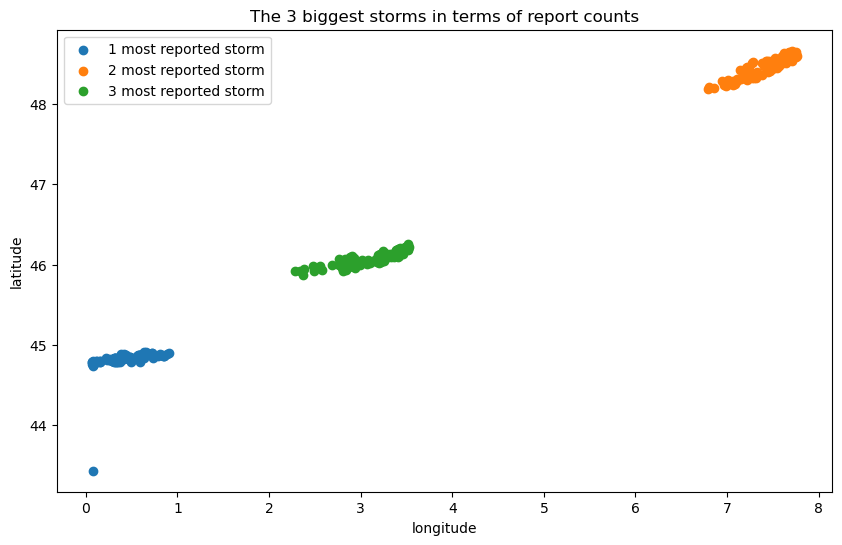

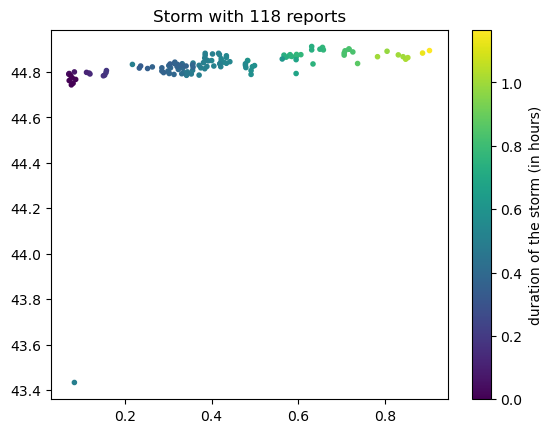

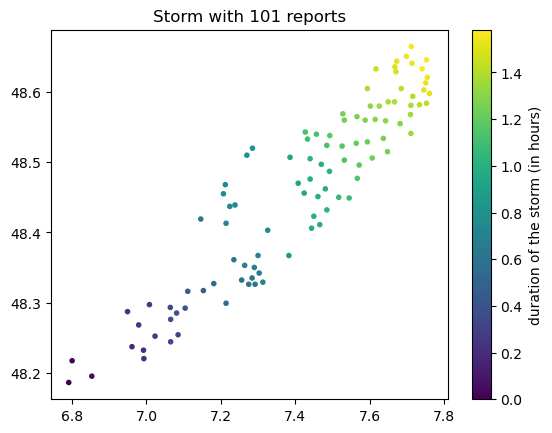

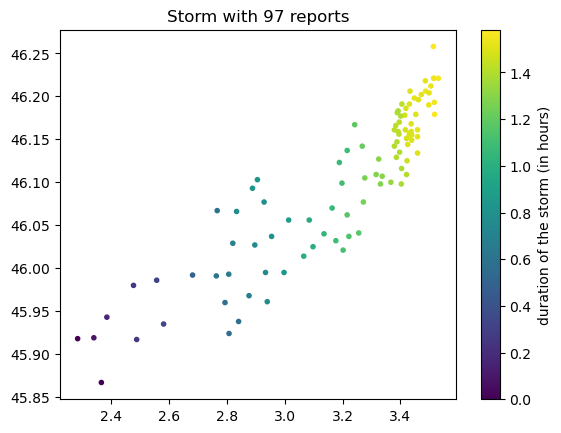

,LATITUDE,LONGITUDE,TIME_EVENT,LABELS
0,45.567,5.933,462946.250000,-1
1,45.596,5.875,462945.866667,-1
2,49.583,1.358,462928.500000,0
3,49.533,1.267,462928.416667,0
4,49.521,1.251,462928.383333,0
...,...,...,...,...
1975,43.279,2.460,458531.666667,192
1976,44.600,-0.933,458514.500000,-1
1977,48.669,5.114,458174.283333,193
1978,48.636,4.952,458174.166667,193


In [70]:
df = run_dbscan_retrieve_classes(df, 0.2, 2, 2)
visualise_biggest(df,3)

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

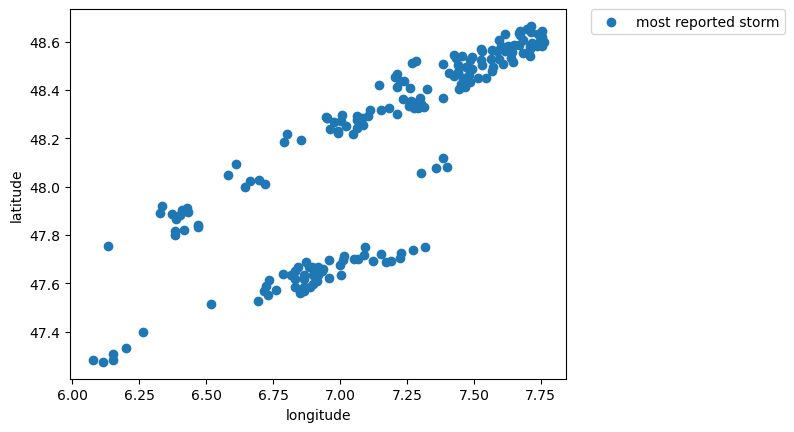

In [237]:
fig, ax = plt.subplots()
ax.scatter(df_biggest.LONGITUDE[df_biggest.LABELS == labels_biggest_storms[0]], df_biggest.LATITUDE[df_biggest.LABELS == labels_biggest_storms[0]], label='most reported storm')
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
fig.show

The storm with most reports is number 163


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

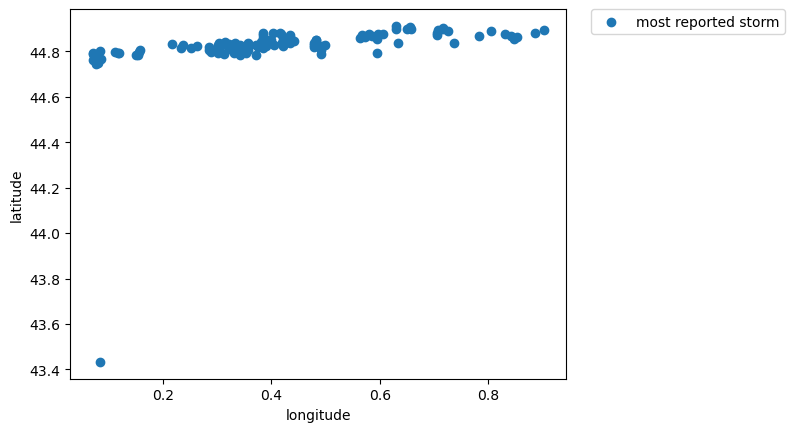

In [23]:
df = run_dbscan_retrieve_classes(df, 0.2, 2, 2)
nb_reports = pd.DataFrame(df['LABELS'].value_counts()).reset_index()
labels_biggest_storms = list(nb_reports.iloc[1:3+1,0])
print('The storm with most reports is number', labels_biggest_storms[0])
    
df_biggest = df.loc[df.LABELS.isin(labels_biggest_storms)]
# plots the biggest storm
fig, ax = plt.subplots()
ax.scatter(df_biggest.LONGITUDE[df_biggest.LABELS == labels_biggest_storms[0]], df_biggest.LATITUDE[df_biggest.LABELS == labels_biggest_storms[0]], label='most reported storm')   
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
fig.show

In [359]:
x = pd.DataFrame(df_biggest.LONGITUDE[df_biggest.LABELS == labels_biggest_storms[0]])
y = pd.DataFrame(df_biggest.LATITUDE[df_biggest.LABELS == labels_biggest_storms[0]])
z = pd.DataFrame(df_biggest.TIME_EVENT[df_biggest.LABELS == labels_biggest_storms[0]])
z = z - z.iloc[-1]
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)
z = z.reset_index(drop=True)
z = list(z)


In [377]:
x = df_biggest.LONGITUDE[df_biggest.LABELS == labels_biggest_storms[0]]
y = df_biggest.LATITUDE[df_biggest.LABELS == labels_biggest_storms[0]]
z = df_biggest.TIME_EVENT[df_biggest.LABELS == labels_biggest_storms[0]]
z = z - z.iloc[-1]
x = x.array
y = y.array
z = z.array


In [378]:
z

<PandasArray>
[ 2.5833333333721384,  2.5666666666511446,  2.5333333333255723,
  2.5333333333255723,  2.4666666666744277,  2.4500000000116415,
   2.400000000023283,   2.400000000023283,  2.3666666666977108,
  2.3500000000349246,
 ...
 0.48333333333721384, 0.45000000001164153, 0.45000000001164153,
  0.4166666666860692, 0.33333333337213844,  0.2833333333255723,
  0.2833333333255723, 0.23333333333721384, 0.23333333333721384,
                 0.0]
Length: 184, dtype: float64

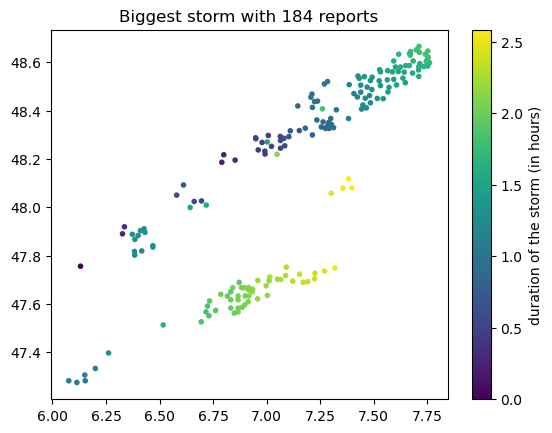

In [385]:
axis = plt.subplot(111, title="Biggest storm with {} reports".format(len(x)))
sc = axis.scatter(x, y, c=z, marker=".")
plt.colorbar(sc, label="duration of the storm (in hours)")
plt.show()


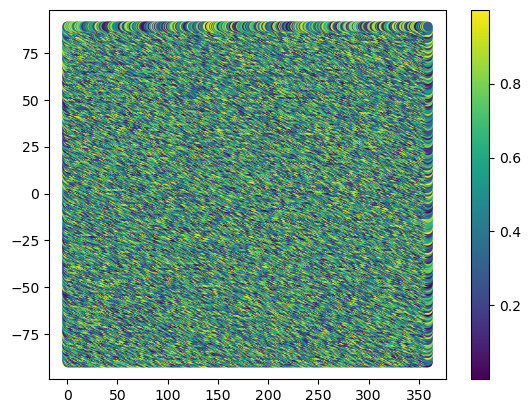

In [361]:
x, y = np.meshgrid(range(0, 360), range(-90, 90))
colors = np.random.random(360*180)
plt.scatter(x.flatten(), y.flatten(), c=colors)
plt.colorbar()

In [363]:
type(colors)

numpy.ndarray

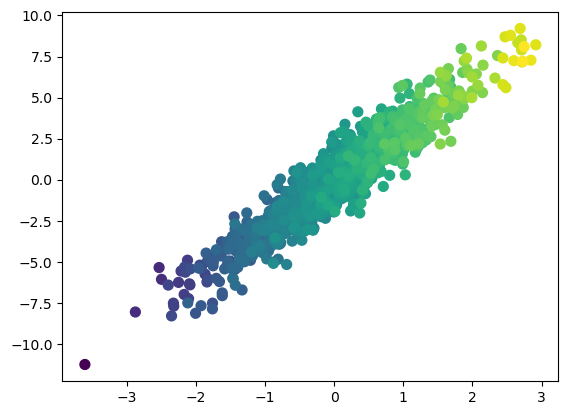

,0
0,-14.231041
1,-10.985223
2,-10.833259
3,-10.477362
4,-9.963864
...,...
995,11.491828
996,11.880216
997,11.943603
998,12.795308


In [308]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)
z = x*4 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
#z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

dfz = pd.DataFrame(z)
dfz

fig, ax = plt.subplots()
ax.scatter(x, y, c=dfz, s=50)
plt.show()

dfz


Visualising the timing of reports with an intensity map 

Inspecting information gains from changing parameters 

Explore bin cluster (percentage of reports we manage to cluster)

Run DBSCAN over since 2013 and compare the result